<h1 align=center><font size = 6>Where to Open a New Pharmacy in Houston</font></h1>

## Executive Summary <a name="ExecSummary"></a>

It is a major challenge for a pharmacist to decide where to open a pharmacy in the city of Houston. Over the past few years, Houston has grown dramatically. New neighborhoods are formed and became home to many new Houstonians, which offers a great opportunity for a pharmacist if she knows where to establish her pharmacy. One of the major duties of the new pharmacy is to provide support for medical facilities as well as residents of a neighborhood. In this report, I have focused on the current distribution of pharmacies in the Houston area. I have compared neighborhoods in terms of the availability of pharmacy per medical centers, and competition, and identified neighborhoods that a low number of pharmacies make them the perfect candidates to establish a new pharmacy.


## Table of contents


* [Executive Summary](#ExecSummary)
* [Introduction](#introduction)
* [Data Acquisition](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The city of Houston has witnessed dramatic growth in the past few years. The oil boom and subsequent increase in business activities surrounding the oil and gas industry have attracted many professionals seeking a job in a growing field. Additionally, Houston has become a major hub for the medical system, serving many patients seeking top-level medical care. It provided an additional opportunity for the professionals, active in the health care system. 

Several new neighborhoods are established to accommodate the newcomers. However, the sporadic growth of the city led to a shortage of medical supplies in a few areas. One of the major medical facilities is the pharmacy. The shortage of pharmacies in an area results in delayed access to drugs which could be life-threatening for the patients. Therefore, in this report, I investigate the potential new locations to open a new pharmacy in Houston to address this issue. I examine the current distribution of the pharmacies and drugstores in Houston and provide the recommendation for the location of new pharmacies to support the medical centers and hospitals in a neighborhood.


## Data Acquisition <a name="data"></a>

The first step to build the framework for the analysis is to identify the **key data components** that are required for the analysis. These data are:
* Map of the city of Houston,
* Boundary of neighborhoods in the city of Houston,
* Exact location of pharmacy and drugstores in the city of Houston,


The **public and private** resources are used to acquire the data. The list of resources is as follows:
* **Folium** tool is a free python library, offering the interactive leaflet map of the places and cities around the globe. 
* **COH Open GIS Data** is a public website that provides the boundary of neighborhoods in the city of Houston.
* **Foursquare API** is used to extract the current location of pharmacies, medical centers, hospitals, and other health centers.


### Map of City of Houston
 


The city of Houston has shared the neighborhood of the city through its website. It can be found in the following [link](https://cohgis-mycity.opendata.arcgis.com/datasets/coh-super-neighborhoods). It includes various resources including kml and shape files of Houston's neighborhoods. In the first step, the shape file of the neighborhoods is downloaded and stored in the local drive.

Folium requires JSON file to generate the map. Therefore, the shapefile is converted to JSON. 

In [1]:
#!conda install -c conda-forge pyshp --yes
import shapefile
from json import dumps

# read the shapefile
reader = shapefile.Reader("COH_SUPER_NEIGHBORHOODS.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr)) 

# write the GeoJSON file
geojson = open("COH_SUPER_NEIGHBORHOODS.json", "w")
geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
geojson.close()

Then, the required variables are initialized to create the Folium map.  

In [2]:
import json
# Initialize Latitude and longitude of Houston
latitude = 29.749907
longitude = -95.358421

Hou_geo = r'COH_SUPER_NEIGHBORHOODS.json'

Normally, the platforms do not have a Folium library. Hence, it is recommended to first install the latest version of the library. Here, CognitiveClass.ai is used for the analysis which requires the installation of the library.  

In [3]:
#!conda install -c conda-forge folium=0.10.0 --yes
import folium

Hou_map = folium.Map(location=[latitude, longitude], zoom_start=10)
Hou_map.choropleth(
    geo_data=Hou_geo,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='City of Houston',
    reset=True
)
Hou_map

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Neighborhood Boundaries

In addition to the map of the neighborhood which is imported as a shapefile, the boundary of each neighborhood needs to be defined. It is done through using the kml file. The file contains the list of neighborhoods, its corresponding boundary in the form of points in the map, and a few additional information. The focus here is on the first two parameters. First, those blocks are extracted that contain the name and boundary of the neighborhoods.

In [4]:
#!conda install -c conda-forge lxml --yes # Additional library needed for shapely
#!conda install -c conda-forge fastkml --yes  # to read kml files
from fastkml import kml
#!conda install -c conda-forge shapely --yes  # to convert to from polygons to list
from shapely.geometry import Polygon

with open('COH_SUPER_NEIGHBORHOODS.kml','rb') as myfile:
    doc=myfile.read()
k = kml.KML()
k.from_string(doc)

outerFeature = list(k.features())
innerFeature = list(outerFeature[0].features())

placemarks = list(innerFeature[0].features()) 

print("*************************************************************************************************************************************")
print("Neighborhood Boundaries are converted to list")
print("*************************************************************************************************************************************")

*************************************************************************************************************************************
Neighborhood Boundaries are converted to list
*************************************************************************************************************************************


Once the neighborhood boundaries are extracted in the form of blocks, they are converted into a list of coordinates that will be used later in the study. Besides, the center of each neighborhood is stored for future use.

In [5]:
import numpy as np  # required for computation in Python
i = 0
x_mean = []
x = []
for p in placemarks:    
    coords = p.geometry
    x.append(list(coords.exterior.coords))
    x_mean.append([sum(y) / len(y) for y in zip(*x[i])])
    i+=1
x_mean = np.array(x_mean)
x = np.array(x)
print('Center Point of the First Ten Neighborhoods: ' + "\n" +'   longitude      latitude '+ '\n' + str(x_mean[:9]))

Center Point of the First Ten Neighborhoods: 
   longitude      latitude 
[[-95.38020399  29.7591084 ]
 [-95.33163351  29.75171522]
 [-95.35389051  29.75833583]
 [-95.25594576  29.73978579]
 [-95.4900818   29.77125591]
 [-95.48748391  29.88128839]
 [-95.29108476  29.62593594]
 [-95.29894761  29.65392898]
 [-95.67028714  29.73741734]]


### Collect Information of Pharmacies and Medical Centers 

The location of pharmacy and medical centers is acquired from **Foursquare API**. It offers a valuable resource to collect information regarding businesses active in an area. I've already created a developer account to access the [website](https://developer.foursquare.com/) and got the credential ID and Secret to connect to the API. 

In [6]:
CLIENT_ID = 'Z30XRHQNIGUG2L2BIL4ASN5PWDQUDVVMU3AQ2GIU5NB1K4FF' # Foursquare ID 
CLIENT_SECRET = '5DMFAOJXOBN4MPDQFZCZWLDV05VLGGO105LASCMVB4IXACY2' # Foursquare Secret
VERSION = '20200401' # Foursquare API version

In [7]:
# function that extracts the url
def generate_url(latitude,longitude,radius,categoryId):
    
    LIMIT = 200 # limit of number of venues returned by Foursquare API

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT,
        categoryId)
    
    return url

In [8]:
# Function that convert JSON files acquired from Foursquare to Pandas Dataframes
def generate_DataFrame(results):
    try:
        venues = results['response']['groups'][0]['items']

        nearby_venues = json_normalize(venues) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby_venues =nearby_venues.loc[:, filtered_columns]

        # filter the category for each row
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

        # clean columns
        nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

        #print(nearby_venues)
    
    except:
        nearby_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])
        pass
    
    return nearby_venues

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In this part, the required data are collected. The data include the pharmacies, medical centers, hospitals, and offices of doctors. Pharmacies should support medical centers, hospitals, and offices of doctors, hence, it is important to provide an accurate number of these facilities. 

In [10]:
import pandas as pd
from pandas.io.json import json_normalize
import requests

df = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])   # Initialize the dataframe
counter = int(0)
radius = 12000    # MAximum radius to search
categoryId_PH = '4bf58dd8d48988d10f951735' # Pharmacy
categoryId_MC = '4bf58dd8d48988d104941735' # Medical Center
categoryId_HO = '4bf58dd8d48988d196941735' # Hospitals
categoryId_DO = '4bf58dd8d48988d177941735' # Doctor's Office

categoryIds = [categoryId_PH , categoryId_MC , categoryId_HO , categoryId_DO]

Dic_categories = {categoryId_PH:"Pharmacies",categoryId_MC:"Medical Centers",categoryId_HO:"Hospitals",categoryId_DO:"Doctor Offices"}

for categoryId in categoryIds:
    for lon,lat in x_mean:

        url_FS = generate_url(lat,lon,radius,categoryId) # generate url for FourSquare

        results_FS = requests.get(url_FS).json()

        df = df.append(generate_DataFrame(results_FS), ignore_index=True)

        counter += 1

    print('The size up to category ' + Dic_categories[categoryId] + ' is: ' + str(df.shape))
    
print("---------------------------------------------------------------------------------------------------------------------------")
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


The size up to category Pharmacies is: (7687, 4)
The size up to category Medical Centers is: (16404, 4)
The size up to category Hospitals is: (23191, 4)
The size up to category Doctor Offices is: (31646, 4)
---------------------------------------------------------------------------------------------------------------------------


name categories        lat  \
0                                      Walgreens   Pharmacy  29.742854   
1                                   CVS pharmacy   Pharmacy  29.751530   
2                                      Walgreens   Pharmacy  29.747265   
3                                   CVS pharmacy   Pharmacy  29.763184   
4  Kelsey-Seybold Clinic - Downtown at The Shops   Pharmacy  29.755546   

         lng  
0 -95.390391  
1 -95.376378  
2 -95.378085  
3 -95.362728  
4 -95.362629

In each neighborhood search, there have been many occurrence of repeated instances. Next, repeated values are removed from the dataframe. 

In [11]:
df = df.groupby(['name','categories','lat','lng']).size().reset_index().rename(columns={0:'count'})
df

name       categories        lat  \
0                            10 Medical  Doctor's Office  29.783820   
1     10th floor Administration offices         Hospital  29.708417   
2                         1140 Westmont  Doctor's Office  29.771971   
3                  17207 Kuykendahl Rd.  Doctor's Office  30.025115   
4                  1960 Family Practice  Doctor's Office  30.016358   
...                                 ...              ...        ...   
3643                      the concierge         Hospital  29.740348   
3644                    thrive vet care     Veterinarian  29.818324   
3645                         wallgreens         Pharmacy  29.671566   
3646         woodfoorest medical clinic  Doctor's Office  29.793568   
3647     woodforest family chiropractic     Chiropractor  29.792457   

            lng  count  
0    -95.568325      5  
1    -95.402349     29  
2    -95.195215      3  
3    -95.479786      2  
4    -95.441754      4  
...         ...    ...  
3643 -95.624562      8  
3644 -95.429297      1  
3645 -95.528274     10  
3646 -95.194130      4  
3647 -95.199063      3  

[3648 rows x 5 columns]

Additionally, the naming of different venues is modified to create a uniform naming system for the entire data set. Also, there are a few unrelated instances that are removed in this process. After filtering, the dataframe is ready for further analysis. 

In [12]:
# Remove duplicate names from the dataframe
df.loc[df.categories == "Dentist's Office", "categories"] = "Doctor's Office"
df.loc[df.categories == "Veterinarian", "categories"] = "Doctor's Office"
df.loc[df.categories == "Chiropractor", "categories"] = "Doctor's Office"
df.loc[df.categories == "Eye Doctor", "categories"] = "Doctor's Office"
df.loc[df.categories == "Optical Shop", "categories"] = "Doctor's Office"
df.loc[df.categories == "Physical Therapist", "categories"] = "Doctor's Office"
df.loc[df.categories == "Drugstore", "categories"] = "Pharmacy"
df.loc[df.categories == "Medical Lab", "categories"] = "Medical Center"
df.loc[df.categories == "Rehab Center", "categories"] = "Medical Center"
df.loc[df.categories == "Mental Health Office", "categories"] = "Medical Center"
df.loc[df.categories == "Assisted Living", "categories"] = "Medical Center"
df.loc[df.categories == "Emergency Room", "categories"] = "Hospital"
df.loc[df.categories == "Urgent Care Center", "categories"] = "Hospital"
df.loc[df.categories == "Hospital Ward", "categories"] = "Hospital"

df = df[(df['categories'] == "Doctor's Office") | (df['categories'] == "Pharmacy") | (df['categories'] == "Medical Center") | (df['categories'] == "Hospital")]

df = df.reset_index(drop=True)

df = df.drop(columns=['count']) # The count column is no longer needed

df['categories'].value_counts()

Doctor's Office    1731
Pharmacy            738
Hospital            636
Medical Center      438
Name: categories, dtype: int64

### City of Houston Neighborhoods

The name and code of the neighborhoods are one of the useful information that the city of Houston has publicly shared. We use this data to map the neighborhoods in the Folium. I have already downloaded the data from the website and uploaded it here. In the next step, we read and clean the data.

In [13]:
df_HN = pd.read_csv('COH_SUPER_NEIGHBORHOODS.csv') # Houston Neighborhoods
df_HN.tail(4)

OBJECTID   PERIMETER  POLYID              SNBNAME  \
84        88   38737.330      24  NEARTOWN - MONTROSE   
85         9  136644.963      16             MEMORIAL   
86        22   72548.445      10   SPRING BRANCH WEST   
87        48  145251.999       9     ADDICKS PARK TEN   

                                  GLOBALID  cohgisCOHGISSNBRAREA  \
84  {8B16C753-FAD1-4C73-8347-5D5B78A2B3DA}                     0   
85  {7E98D2F0-60FE-4C2E-9B83-E8095463935F}                     0   
86  {F9E34D75-B001-4F95-9228-813A513E6AF9}                     0   
87  {E2A62333-8463-4744-9BEB-2046A5F34C1E}                     0   

    cohgisCOHGISSNBRLEN COUNCIL_ACTIVE          RECOGNITION_DATE  \
84                    0            Yes  2001-10-15T00:00:00.000Z   
85                    0            Yes  2010-12-15T00:00:00.000Z   
86                    0            Yes  2000-05-11T00:00:00.000Z   
87                    0            NaN                       NaN   

                                          SnbrInfoURL WeCan Top10 CEA_FLAG  \
84  http://www.houstontx.gov/superneighborhoods/24...   NaN   NaN        N   
85  http://www.houstontx.gov/superneighborhoods/16...   NaN   NaN        N   
86  http://www.houstontx.gov/superneighborhoods/10...   NaN   NaN        N   
87  http://www.houstontx.gov/superneighborhoods/9....   NaN   NaN        N   

       Shapearea       Shapelen  
84  9.116550e+07   38737.329066  
85  2.753121e+08  131791.417830  
86  2.290214e+08   96562.357548  
87  6.532924e+08  145118.396462

Here, I showed the tail of the data to emphasize that the data is not sorted. It is important to keep in mind that it might be the case for public and private data.

Next, we assign the center and border to each neighborhood.


In [14]:
df_HN = df_HN[['OBJECTID','SNBNAME']]   # select the ID and name to be passed to the dataframe

df_HN['Center'] = x_mean.tolist()       # add center of neighborhoods to dataframe

df_HN['Border'] = pd.Series(x, index=df_HN.index) # add border of neighborhoods to dataframe

df_HN.sort_values(["OBJECTID"],inplace=True)  

df_HN = df_HN.reset_index(drop=True)

df_HN = df_HN.rename(columns={"OBJECTID": "ID", "SNBNAME": "Neighborhood"})

df_HN

ID                  Neighborhood  \
0    1                   FOURTH WARD   
1    2                   SECOND WARD   
2    3                      DOWNTOWN   
3    4    CLINTON PARK TRI-COMMUNITY   
4    5                GREATER UPTOWN   
..  ..                           ...   
83  84                EDGEBROOK AREA   
84  85                 MAGNOLIA PARK   
85  86  AFTON OAKS / RIVER OAKS AREA   
86  87                  BRIAR FOREST   
87  88           NEARTOWN - MONTROSE   

                                      Center  \
0   [-95.38020398569252, 29.759108401057734]   
1   [-95.33163350698247, 29.751715224278033]   
2    [-95.35389051279583, 29.75833583375745]   
3   [-95.25594575801381, 29.739785785250515]   
4   [-95.49008179803242, 29.771255909812766]   
..                                       ...   
83  [-95.22871603760505, 29.648054727077923]   
84   [-95.29422138462907, 29.73392093689862]   
85  [-95.43237514249446, 29.756739225233073]   
86     [-95.553999901593, 29.75741609225529]   
87  [-95.39718942382693, 29.756123936352637]   

                                               Border  
0   [(-95.3858120191703, 29.76157948522655), (-95....  
1   [(-95.32015067938119, 29.75615512902487), (-95...  
2   [(-95.34735199664924, 29.766239432477022), (-9...  
3   [(-95.25626269892858, 29.77366763509899), (-95...  
4   [(-95.45387738771834, 29.780766069587443), (-9...  
..                                                ...  
83  [(-95.25133004406092, 29.6525737635016), (-95....  
84  [(-95.27531854167518, 29.72752067919415), (-95...  
85  [(-95.41638308612241, 29.759705813982627), (-9...  
86  [(-95.56183476935551, 29.76182774282135), (-95...  
87  [(-95.40868608478468, 29.760560863193806), (-9...  

[88 rows x 4 columns]

There are 88 neighborhoods in the city of Houston. It does not necessarily  mean that all of these neighborhoods are equipped with a health center. Several neighborhoods are not residential and do not need to have any health facility. 

## Methodology <a name="methodology"></a>

Houston has grown rapidly in the last few years. However, it has not been uniform for all neighborhoods. There has been a well-established neighborhood that enjoys access to a balanced health care system. Also, some neighborhoods have been a hub to global medicine and served the nation. Here, we aim to find the newly developed neighborhoods that the lack of new pharmacies may impact the health care standard. 

First and foremost, the pharmacies and other medical centers should be labeled based on their neighborhood. It is done by using the capabilities offered by **Shapely**. It enables us to check **if a medical facility belongs to a certain neighborhood**. 

The second important point to keep in mind is that the analysis should be conducted to highlight the areas that have had medical facilities, but not enough pharmacy in the area to serve them. It means that there will be areas without pharmacy. However, population density is so low and makes it uneconomical to establish a new pharmacy. Although the population density is not included in this analysis, the lack of other medical facilities could indicate **low population density**.

The third point is the pharmacy density in a populated area. Although there are a few neighborhoods with a low ratio of pharmacy to medical facilities, the **total number of pharmacies is so high**, rendering opening a new pharmacy uneconomical. 

Keep in mind that eventually, the solution depends on the pharmacist's personal choices in terms of commute and type of pharmacy.  


## Analysis <a name="analysis"></a>

In this section, I will go through the data and examine different approaches to generate the pharmacy shortage map. Different indices are introduced to evaluate the current distribution of pharmacies and other medical facilities. 

The first objective is to combine two data sets and determine the neighborhood for each medical facility. The algorithm that designed for this task is as follows:

1. Read the next latitude and longitude of the facility,
2. Assign the coordinate as a point,
3. Read the next neighborhood border,
4. Assign neighborhood border as a polygon,
5. Check if the point is inside the polygon

     if yes, go to 1
     
     if no, go to 3
     
6. Repeat until there is no more facility

The code is developed to implement the algorithm. This is the most time-consuming part of the operation. However, it is essential to find the neighborhood of each medical facility to determine areas with a shortage of pharmacy. 

In [15]:
# The function to check if a point is inside a polygon
from shapely.geometry import Polygon
from shapely.geometry import Point

def IsInNeighborhood(border,lat,lon):
    poly = Polygon(border)
    p1 = Point(lon,lat)
    return p1.within(poly)

In [16]:
neighborhood_ = []
center_ = []
No_Col = df_HN.shape

# While loop to determine the neighborhood of each medical facility

for _, row in df.iterrows():
    condition = True
    i = 0
    while (condition and No_Col[0]>i):
        value = df_HN.loc[i,'Neighborhood']
        center = df_HN.loc[i,'Center']
        border = df_HN.loc[i,'Border']
        if IsInNeighborhood(border,row[['lat']].values,row[['lng']].values):
            condition = False       
        i+=1
    if condition:
        value = "NA"
    neighborhood_.append(value)
    center_.append(center)
    
df_NH_ = pd.DataFrame({'Neighborhood': neighborhood_})
df_C_ = pd.DataFrame({'Center': center_})

print('The header for neighborhood is: '+ '\n'+str(df_NH_['Neighborhood'].head(5)))
print('************************************************************************************************************************************')
print('The header for centers is: '+ '\n'+str(df_C_['Center'].head(5)))
print('************************************************************************************************************************************')

The header for neighborhood is: 
0               MEMORIAL
1    MEDICAL CENTER AREA
2             NORTHSHORE
3                     NA
4                     NA
Name: Neighborhood, dtype: object
************************************************************************************************************************************
The header for centers is: 
0      [-95.5506093939848, 29.75948470556859]
1    [-95.39807364122866, 29.705957702009815]
2    [-95.20882136974735, 29.779258987016924]
3    [-95.39718942382693, 29.756123936352637]
4    [-95.39718942382693, 29.756123936352637]
Name: Center, dtype: object
************************************************************************************************************************************


Next, we add the neighborhoods and the coordinate of the central point centers to the dataframe.

In [18]:
df['Neighborhood'] = df_NH_

df['Center'] = df_C_

df

name       categories        lat  \
0                            10 Medical  Doctor's Office  29.783820   
1     10th floor Administration offices         Hospital  29.708417   
2                         1140 Westmont  Doctor's Office  29.771971   
3                  17207 Kuykendahl Rd.  Doctor's Office  30.025115   
4                  1960 Family Practice  Doctor's Office  30.016358   
...                                 ...              ...        ...   
3538                      the concierge         Hospital  29.740348   
3539                    thrive vet care  Doctor's Office  29.818324   
3540                         wallgreens         Pharmacy  29.671566   
3541         woodfoorest medical clinic  Doctor's Office  29.793568   
3542     woodforest family chiropractic  Doctor's Office  29.792457   

            lng          Neighborhood  \
0    -95.568325              MEMORIAL   
1    -95.402349   MEDICAL CENTER AREA   
2    -95.195215            NORTHSHORE   
3    -95.479786                    NA   
4    -95.441754                    NA   
...         ...                   ...   
3538 -95.624562  ELDRIDGE / WEST OAKS   
3539 -95.429297     CENTRAL NORTHWEST   
3540 -95.528274            BRAYS OAKS   
3541 -95.194130                    NA   
3542 -95.199063                    NA   

                                        Center  
0       [-95.5506093939848, 29.75948470556859]  
1     [-95.39807364122866, 29.705957702009815]  
2     [-95.20882136974735, 29.779258987016924]  
3     [-95.39718942382693, 29.756123936352637]  
4     [-95.39718942382693, 29.756123936352637]  
...                                        ...  
3538   [-95.6702871405326, 29.737417343991716]  
3539   [-95.47063762248688, 29.84089860752083]  
3540  [-95.52945761584641, 29.650491193372055]  
3541  [-95.39718942382693, 29.756123936352637]  
3542  [-95.39718942382693, 29.756123936352637]  

[3543 rows x 6 columns]

There are a few neighborhoods that **do not have any medical facility or pharmacy**. We filter them out since the population density is so low that it is not economical to start a new pharmacy of any other medical center in those areas. 

In [19]:
df = df[df.Neighborhood != 'NA']

df = df.reset_index(drop=True)

df

name       categories  \
0                                           10 Medical  Doctor's Office   
1                    10th floor Administration offices         Hospital   
2                                        1140 Westmont  Doctor's Office   
3                                     20/20 Eye Clinic  Doctor's Office   
4                                 2626 south loop west   Medical Center   
...                                                ...              ...   
1826           st. joseph internal medicine associates  Doctor's Office   
1827  texas children's Hospital Primary Care Physician  Doctor's Office   
1828                                     the concierge         Hospital   
1829                                   thrive vet care  Doctor's Office   
1830                                        wallgreens         Pharmacy   

            lat        lng               Neighborhood  \
0     29.783820 -95.568325                   MEMORIAL   
1     29.708417 -95.402349        MEDICAL CENTER AREA   
2     29.771971 -95.195215                 NORTHSHORE   
3     29.960195 -95.539022                WILLOWBROOK   
4     29.678598 -95.421301                 SOUTH MAIN   
...         ...        ...                        ...   
1826  29.747780 -95.366115                   DOWNTOWN   
1827  29.696041 -95.332966  GREATER OST / SOUTH UNION   
1828  29.740348 -95.624562       ELDRIDGE / WEST OAKS   
1829  29.818324 -95.429297          CENTRAL NORTHWEST   
1830  29.671566 -95.528274                 BRAYS OAKS   

                                        Center  
0       [-95.5506093939848, 29.75948470556859]  
1     [-95.39807364122866, 29.705957702009815]  
2     [-95.20882136974735, 29.779258987016924]  
3     [-95.54848040919772, 29.955273146197122]  
4     [-95.41833371889936, 29.676321591279695]  
...                                        ...  
1826   [-95.35389051279583, 29.75833583375745]  
1827    [-95.34825191767226, 29.6939374506367]  
1828   [-95.6702871405326, 29.737417343991716]  
1829   [-95.47063762248688, 29.84089860752083]  
1830  [-95.52945761584641, 29.650491193372055]  

[1831 rows x 6 columns]

The **categorical data** such as Doctor's Office or Pharmacy is not alone to perform the data analysis. They should be transferred into **indicator variables** to allow us to apply the mathematical operation. This is simply done by using **get_dummies**, a powerful function in Pandas.  

In [20]:
dummies = pd.get_dummies(df['categories'])
df = pd.concat([df,dummies],axis=1)

In [22]:
# generate new columsn to accomodate the latitude and longitute of neighborhood center
df[['Center_lng','Center_lat']] = pd.DataFrame(df.Center.values.tolist(), index= df.index)

df = df.drop(columns=['Center'])

df

name       categories  \
0                                           10 Medical  Doctor's Office   
1                    10th floor Administration offices         Hospital   
2                                        1140 Westmont  Doctor's Office   
3                                     20/20 Eye Clinic  Doctor's Office   
4                                 2626 south loop west   Medical Center   
...                                                ...              ...   
1826           st. joseph internal medicine associates  Doctor's Office   
1827  texas children's Hospital Primary Care Physician  Doctor's Office   
1828                                     the concierge         Hospital   
1829                                   thrive vet care  Doctor's Office   
1830                                        wallgreens         Pharmacy   

            lat        lng               Neighborhood  Doctor's Office  \
0     29.783820 -95.568325                   MEMORIAL                1   
1     29.708417 -95.402349        MEDICAL CENTER AREA                0   
2     29.771971 -95.195215                 NORTHSHORE                1   
3     29.960195 -95.539022                WILLOWBROOK                1   
4     29.678598 -95.421301                 SOUTH MAIN                0   
...         ...        ...                        ...              ...   
1826  29.747780 -95.366115                   DOWNTOWN                1   
1827  29.696041 -95.332966  GREATER OST / SOUTH UNION                1   
1828  29.740348 -95.624562       ELDRIDGE / WEST OAKS                0   
1829  29.818324 -95.429297          CENTRAL NORTHWEST                1   
1830  29.671566 -95.528274                 BRAYS OAKS                0   

      Hospital  Medical Center  Pharmacy  Center_lng  Center_lat  
0            0               0         0  -95.550609   29.759485  
1            1               0         0  -95.398074   29.705958  
2            0               0         0  -95.208821   29.779259  
3            0               0         0  -95.548480   29.955273  
4            0               1         0  -95.418334   29.676322  
...        ...             ...       ...         ...         ...  
1826         0               0         0  -95.353891   29.758336  
1827         0               0         0  -95.348252   29.693937  
1828         1               0         0  -95.670287   29.737417  
1829         0               0         0  -95.470638   29.840899  
1830         0               0         1  -95.529458   29.650491  

[1831 rows x 11 columns]

The current dataframe presents the medical facilities and pharmacies. In the next step, we change the structure of the dataframe and report the facilities and pharmacies for each neighborhood. Therefore, we will be able to compare different neighborhoods and decide on the new location for the pharmacy. 

In [23]:
# Group the dataframe by neighborhoods
df = df.groupby(['Neighborhood']).agg({'lat':'mean', 'lng':'mean', 'Center_lng':'mean', 'Center_lat':'mean', "Doctor's Office":'sum',"Hospital":'sum',"Medical Center":'sum',"Pharmacy":'sum'})

df

lat        lng  Center_lng  \
Neighborhood                                                         
ACRES HOME                        29.866288 -95.422773  -95.455918   
ADDICKS PARK TEN                  29.787341 -95.686280  -95.635004   
AFTON OAKS / RIVER OAKS AREA      29.746208 -95.440345  -95.432375   
ALIEF                             29.687675 -95.579579  -95.603873   
ASTRODOME AREA                    29.692180 -95.401028  -95.403107   
...                                     ...        ...         ...   
WESTBURY                          29.660416 -95.464785  -95.487705   
WESTCHASE                         29.731985 -95.567879  -95.565364   
WESTWOOD                          29.676734 -95.548081  -95.547154   
WILLOW MEADOWS / WILLOWBEND AREA  29.672407 -95.453156  -95.450311   
WILLOWBROOK                       29.965873 -95.549086  -95.548480   

                                  Center_lat  Doctor's Office  Hospital  \
Neighborhood                                                              
ACRES HOME                         29.879423                2         0   
ADDICKS PARK TEN                   29.831287               11         6   
AFTON OAKS / RIVER OAKS AREA       29.756739                5         2   
ALIEF                              29.682278                9         3   
ASTRODOME AREA                     29.693829               30        13   
...                                      ...              ...       ...   
WESTBURY                           29.658259                3         0   
WESTCHASE                          29.722517                7         4   
WESTWOOD                           29.673548                4         1   
WILLOW MEADOWS / WILLOWBEND AREA   29.672385                3         1   
WILLOWBROOK                        29.955273               25         2   

                                  Medical Center  Pharmacy  
Neighborhood                                                
ACRES HOME                                     1         2  
ADDICKS PARK TEN                               5         0  
AFTON OAKS / RIVER OAKS AREA                   0         4  
ALIEF                                          4        15  
ASTRODOME AREA                                 5         4  
...                                          ...       ...  
WESTBURY                                       0         2  
WESTCHASE                                      2         6  
WESTWOOD                                       1         3  
WILLOW MEADOWS / WILLOWBEND AREA               0         2  
WILLOWBROOK                                    6         1  

[79 rows x 8 columns]

Let's take a look at the total number of medical facilities and pharmacies in Houston. It helps us have an understanding of the concentration of pharmacies in the city of Houston. 

To plot the data, I use **matplotlib** which is a powerful visualization tool in Python. The bar chart is a great tool to compare small and mid-size dataset. Therefore, we use it for comparison. 

In [24]:
import matplotlib
import matplotlib.pyplot as plt

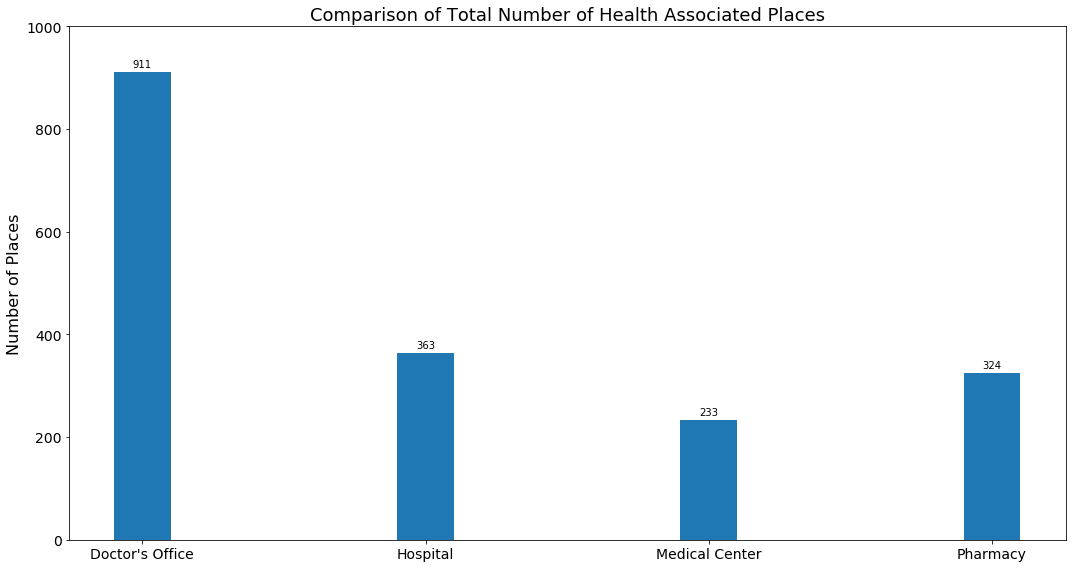

In [25]:
labels = ["Doctor's Office", "Hospital", "Medical Center","Pharmacy"]
Total = df[["Doctor's Office", "Hospital", "Medical Center","Pharmacy"]].sum(axis=0)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects = ax.bar(x , Total, width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Places',fontsize = 16)
ax.set_title('Comparison of Total Number of Health Associated Places',fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1000)

ax.tick_params(labelsize=14)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

fig.tight_layout()

plt.show()

The chart reveals an interesting result that on average, there are approximately five medical facilities for every pharmacy. It also shows that the offices of doctors are much higher than every other health center. An important point to keep in mind is that hospitals may have their pharmacies. It means that pharmacies could be part of hospitals and do not serve any other medical center. 

The chart compares the number of pharmacies against other facilities in the city of Houston. It is a good start, but it does not provide criteria to compare different neighborhoods. Here, I introduced the pharmacy concentration index to normalize the number of pharmacies against other facilities. **1** represents **maximum concentration of pharmacies** and **0** is **Pharmacy Concentration Index** for the neighborhoods that **there is not any pharmacy**. Keep in mind that there are a few neighborhoods with pharmacy but without any health facility that are set as one.


In [26]:
df['Pharmacy Concentration Index'] = df[["Pharmacy"]].sum(axis=1)/df[["Doctor's Office", "Hospital", "Medical Center"]].sum(axis=1)

df_t = df.replace([np.inf, -np.inf], np.nan)

df['Pharmacy Concentration Index'] = df['Pharmacy Concentration Index'].replace([np.inf, -np.inf], df_t['Pharmacy Concentration Index'].max())

df['Pharmacy Concentration Index'] = df['Pharmacy Concentration Index']/df['Pharmacy Concentration Index'].max()

print('Pharmacy Concentration Index for the Neighborhoods in the city of Houston')

df['Pharmacy Concentration Index'].head()

Pharmacy Concentration Index for the Neighborhoods in the city of Houston


Neighborhood
ACRES HOME                      0.333333
ADDICKS PARK TEN                0.000000
AFTON OAKS / RIVER OAKS AREA    0.285714
ALIEF                           0.468750
ASTRODOME AREA                  0.041667
Name: Pharmacy Concentration Index, dtype: float64

In the next step, let's plot a heat map of the **Pharmacy Concentration Index** for the neighborhoods in the city of Houston. It provides a great way to examine the neighborhoods and find out which neighborhoods have **high concentration of pharmacies** and is neighborhoods that should be avoided for starting a new pharmacy. 

In [28]:
df = df.reset_index()

threshold_scale = np.linspace(df['Pharmacy Concentration Index'].min(),
                              df['Pharmacy Concentration Index'].max(),
                              6, dtype=float)
threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 0.1

latitude = 29.749907
longitude = -95.358421

# let Folium determine the scale.
Hou_map = folium.Map(location=[latitude, longitude], zoom_start=10)
Hou_map.choropleth(
    geo_data=Hou_geo,
    data=df,
    columns=['Neighborhood', 'Pharmacy Concentration Index'],
    key_on='feature.properties.Neighborhood',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Pharmacy Concentration Index',
    reset=True
)
Hou_map

The heat map is a great way to observe which area has a higher concentration of pharmacies. Now, let's change the direction, and emphasize on the neighborhoods that have **shortage**.  

In [29]:
df_Pharmacy_Location_Favorites = df.copy()
df_Pharmacy_Location_Favorites['Pharmacy Requirement Index'] = df['Pharmacy Concentration Index'].apply(lambda x: 1.0-x if x <= 1.0 else 0)

threshold_scale = np.linspace(df_Pharmacy_Location_Favorites['Pharmacy Requirement Index'].min(),
                              df_Pharmacy_Location_Favorites['Pharmacy Requirement Index'].max(),
                              6, dtype=float)
threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 0.1

latitude = 29.749907
longitude = -95.358421


# let Folium determine the scale.
Hou_map = folium.Map(location=[latitude, longitude], zoom_start=10)
Hou_map.choropleth(
    geo_data=Hou_geo,
    data=df_Pharmacy_Location_Favorites,
    columns=['Neighborhood', 'Pharmacy Requirement Index'],
    key_on='feature.properties.Neighborhood',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Pharmacy Requirement Index',
    reset=True
)
Hou_map

As you can see on the map, there are many candidates represented in a dark color that have the potential for opening a new pharmacy. Let's now rank them in a bar chart and examine the number of pharmacies and medical centers. 

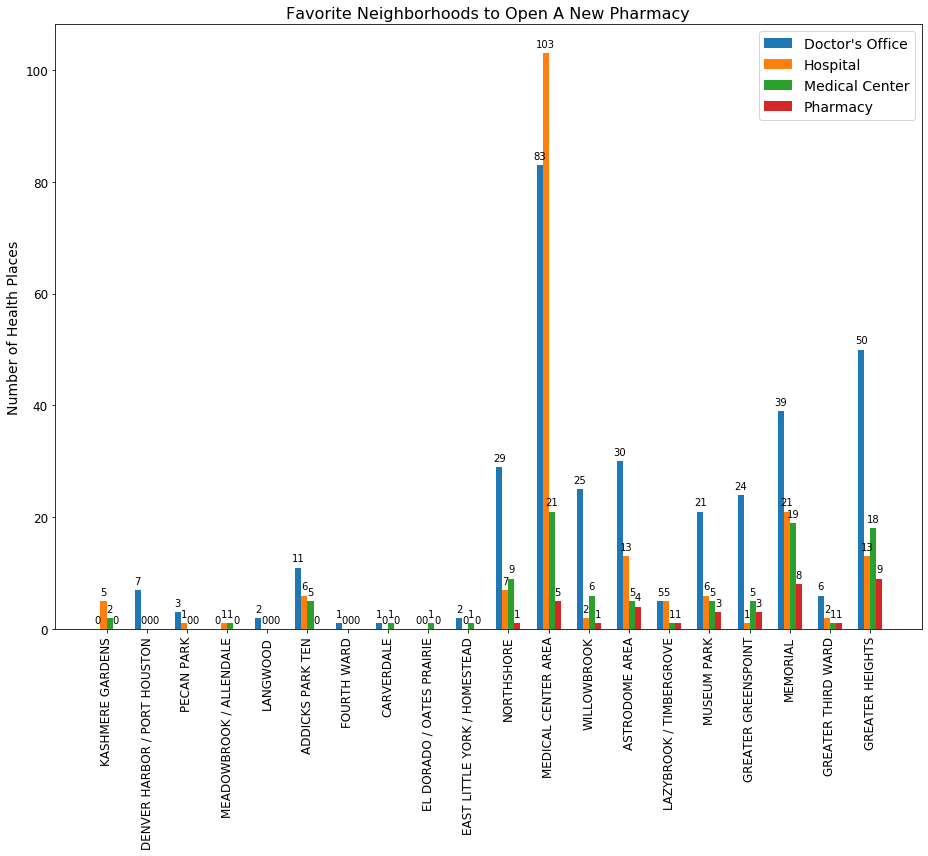

In [30]:
df_Pharmacy_Location_Favorites_1 = df_Pharmacy_Location_Favorites.sort_values(by=['Pharmacy Requirement Index'], ascending=False).reset_index(drop=True)

labels = df_Pharmacy_Location_Favorites_1.loc[:19,'Neighborhood'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

import matplotlib.pyplot as plt2

fig2, ax2 = plt2.subplots(figsize=(13, 12))

rects1 = ax2.bar(x - width*3/2, df_Pharmacy_Location_Favorites_1.loc[:19,"Doctor's Office"].tolist(), width, label="Doctor's Office")
rects2 = ax2.bar(x - width/2, df_Pharmacy_Location_Favorites_1.loc[:19,"Hospital"].tolist(), width, label='Hospital')
rects3 = ax2.bar(x + width/2, df_Pharmacy_Location_Favorites_1.loc[:19,"Medical Center"].tolist(), width, label='Medical Center')
rects4 = ax2.bar(x + width*3/2, df_Pharmacy_Location_Favorites_1.loc[:19,"Pharmacy"].tolist(), width, label='Pharmacy')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Number of Health Places', fontsize = 14)
ax2.set_title('Favorite Neighborhoods to Open A New Pharmacy', fontsize = 16)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize = 12)
ax2.legend(fontsize=14)
plt2.xticks(rotation=90)

ax2.tick_params(labelsize=12)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height+0.2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig2.tight_layout()

plt2.show()

The first **ten neighborhoods**, as can be seen in the bar chart, **do not have any pharmacy** which makes them great candidates for the pharmacy. However, a closer look shows that many of them do not have enough medical facilities that justify opening a pharmacy.  

Let's add another filter to the data. To avoid areas with high competition, I remove the neighborhoods with more than 4 pharmacies. Also, the pharmacy should be near medical facilities, therefore, I ignored the neighborhoods with less than 10 health centers.


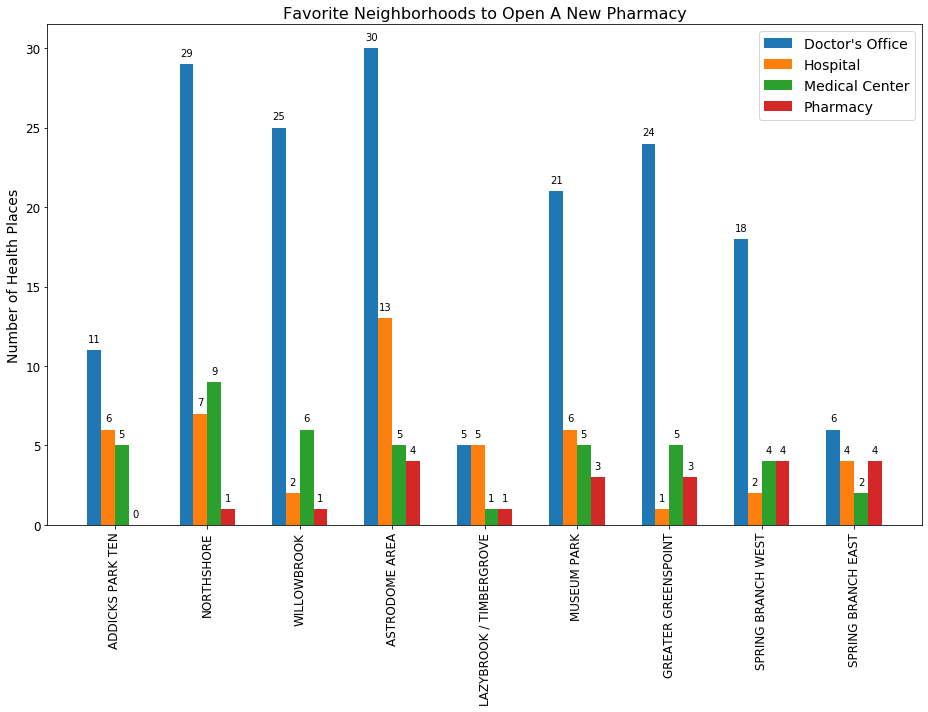

In [31]:
df_Pharmacy_Location_Favorites_2 = df_Pharmacy_Location_Favorites.sort_values(by=['Pharmacy Requirement Index'], ascending=False).reset_index(drop=True)
df_Pharmacy_Location_Favorites_2 = df_Pharmacy_Location_Favorites_2[(df_Pharmacy_Location_Favorites_2[["Doctor's Office", "Hospital", "Medical Center"]].sum(axis=1) > 10) & (df_Pharmacy_Location_Favorites_2[["Pharmacy"]].sum(axis=1) < 5) ].reset_index(drop=True)

labels = df_Pharmacy_Location_Favorites_2.loc[:,'Neighborhood'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

import matplotlib.pyplot as plt3

fig, ax = plt3.subplots(figsize=(13, 10))

rects1 = ax.bar(x - width*3/2, df_Pharmacy_Location_Favorites_2.loc[:,"Doctor's Office"].tolist(), width, label="Doctor's Office")
rects2 = ax.bar(x - width/2, df_Pharmacy_Location_Favorites_2.loc[:,"Hospital"].tolist(), width, label='Hospital')
rects3 = ax.bar(x + width/2, df_Pharmacy_Location_Favorites_2.loc[:,"Medical Center"].tolist(), width, label='Medical Center')
rects4 = ax.bar(x + width*3/2, df_Pharmacy_Location_Favorites_2.loc[:,"Pharmacy"].tolist(), width, label='Pharmacy')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Health Places', fontsize = 14)
ax.set_title('Favorite Neighborhoods to Open A New Pharmacy', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend(fontsize=14)
plt.xticks(rotation=90)
ax.tick_params(labelsize=12)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height+0.2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt3.show()

These neighborhoods are very good candidates for a new pharmacy. Let's map them and conclude the analysis. 

In [32]:
threshold_scale = np.linspace(df_Pharmacy_Location_Favorites['Pharmacy Requirement Index'].min(),
                              df_Pharmacy_Location_Favorites['Pharmacy Requirement Index'].max(),
                              6, dtype=float)

threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 0.1

latitude = 29.749907
longitude = -95.358421


# let Folium determine the scale.
Hou_map = folium.Map(location=[latitude, longitude], zoom_start=10)
Hou_map.choropleth(
    geo_data=Hou_geo,
    data=df_Pharmacy_Location_Favorites,
    columns=['Neighborhood', 'Pharmacy Requirement Index'],
    key_on='feature.properties.Neighborhood',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Pharmacy Requirement Index',
    reset=True
)
Hou_map

df_Pharmacy_Location_Favorites_2['Pharmacy Requirement Index'] = df_Pharmacy_Location_Favorites_2['Pharmacy Requirement Index'].round(2)

# add markers to map
for lat, lng, PhRI, Neighborhood in zip(df_Pharmacy_Location_Favorites_2['Center_lat'], df_Pharmacy_Location_Favorites_2['Center_lng'], df_Pharmacy_Location_Favorites_2['Pharmacy Requirement Index'], df_Pharmacy_Location_Favorites_2['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, PhRI)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Hou_map)

Hou_map

## Results and Discussion <a name="results"></a>

The extensive analysis reveals that only a handful of neighborhoods are the right candidates for opening a new pharmacy in the city of Houston. These neighborhoods have an adequate number of medical centers to justify opening a new pharmacy and the competition is not as high as other neighborhoods. Although initially, the list included more than twenty Houston neighborhoods, the filtering process allowed us highlighting the neighborhoods that have a better chance for success of a new pharmacy.

It should be pointed out that we assume the goal of this analysis is to open a typical pharmacy that could serve various types of medical facilities. Also, it is not a special pharmacy aimed to provide service for a limited sector. If our pharmacy is large enough to withstand **a fierce competition**, then, we can consider at the neighborhoods with the highest number of medical facilities, such as **Medical Center Area** and **Greater Heights**. There are a lot of medical centers, doctor offices, and hospitals, in these two neighborhoods that a new pharmacy could support them.

For smaller pharmacies with **limited budget**, it is recommended to avoid areas with any competition. **Addicks Park Ten** is the recommended location in this category. There are at least twenty medical centers in the neighborhood. The **Pharmacy Requirement Index** is **one** and there is no other pharmacy in the neighborhood. It is **recommended** neighborhood for a new small to a mid-size pharmacy. However, one issue is its location and the distance to other neighborhoods, which makes its scope limited to a certain area. 

Although a few neighborhoods **do not have a perfect Pharmacy Requirement Index**, their location and **being close to city center** may play a role in attracting a new pharmacist. **Lazybrook** is among these neighborhoods. It is close to a newly developed height neighborhood, it has only one pharmacy, and it can support new health care facilities that may develop in the area for the next few years. 

In summary, we recommend a new place based on the initial budget, type of pharmacy, and its location relative to other medical centers and pharmacies.


## Conclusion <a name="conclusion"></a>

In this project, we leveraged extensive private and public resources to provide recommendations for a pharmacist aiming to open a pharmacy in the city of Houston. Various scenarios are evaluated based on the budget and the size of the new pharmacy to recommend the neighborhood. First, public data shared by the City of Houston are used to generate an initial map of the neighborhoods. Then, using Foursquare API to explore Houston helped us list the pharmacies and medical facilities and their location for all the neighborhoods. Data cleaning and wrangling provided better insight into how different neighborhoods are ranked in terms of medical facilities. Visualization of the data in the Folium open library allowed us to identify the neighborhoods with high pharmacy density on the map. Since the data were not normalized, we introduced a new index for comparing the neighborhoods. The further analysis showed that **Addicks Park Ten**, **Medical Center Area**, and **Lazybrook** are the best candidates for an opening a new pharmacy if the priorities are **limited competition**, **access to a large market**, and **closeness to the center of city**, respectively. 

The analysis is a great first step, however, it can be trimmed further to address the needs of a pharmacist with particular priorities in mind.
